In [1]:
import ee
import datetime
import os
import itertools
import sys

from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geemap

import subprocess
from subprocess import PIPE

In [2]:
ee.Initialize()

##### Basic parameters

In [3]:
region_en = 'xinan'

In [4]:
# define basic parameters
year_range = [f'{i}_{i+2}' for i in range(1990,2020,3)]

In [5]:
img_path     = 'users/rlyon2/China_built_classification/03_temporal_checked'
sample_path  = 'users/wangjinzhulala/China_built_up/03_sample_train_test_split'

##### Calculate the acuracy after temporal correction

In [6]:
Acc_temporal_checked = {}

for i,year in enumerate(year_range):

        # get the img and untouched sample
        sample = f'{sample_path}/Grid_select_{region_en}_{year}'

        # get the classificaiton, rename the band so we can use Accuracy_assesment module
        img_my   = ee.Image(f'{img_path}/Mosaic_only_forward_{region_en}')\
                     .gte(len(year_range)-i)\
                     .rename('classification')

        # extract the img pixel value to test_sample
        test_extract_img   = img_my.sampleRegions(  collection = sample, 
                                                    properties = ['Built'], 
                                                    scale      = 30,
                                                    tileScale = 6)

        # compute the accuracy and put them into a df
        Acc_temporal_checked[(region_en,year)] = [test_extract_img.errorMatrix('Built','classification')\
                                                                 .accuracy().getInfo()]
        
        
        # print out the process
        print(f'{region_en}_{year}')

xinan_1990_1992
xinan_1993_1995
xinan_1996_1998
xinan_1999_2001
xinan_2002_2004
xinan_2005_2007
xinan_2008_2010
xinan_2011_2013
xinan_2014_2016
xinan_2017_2019


##### Format the accuracy df and make plots

In [7]:
# format the Acc_temporal_checked_df
Acc_temporal_checked_df = pd.DataFrame(Acc_temporal_checked).T
Acc_temporal_checked_df.reset_index(inplace=True)
Acc_temporal_checked_df.columns = ['Region','Year','Accuracy']

# save the df to local drive
Acc_temporal_checked_df.to_csv(f'./Result/Temporal_check_acc_{region_en}.csv')

In [8]:
# import the original accuracy for comparison
Original_acc = pd.read_csv(f'../Process_2_Classification_process/Sub_Process_6_Before_classification_Feature_selection/Result/Sample_size_acc_{region_en}.csv')
Original_acc = Original_acc[(Original_acc['Sample_size'])==95]

In [9]:
# add accuracy type to each df
Acc_temporal_checked_df['Type'] = 'Temporal Correction'
Original_acc['Type'] = 'Original'

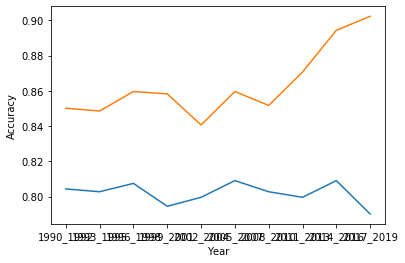

In [10]:
sns.lineplot(x='Year',y='Accuracy',data=Acc_temporal_checked_df)
sns.lineplot(x='Year',y='Accuracy',data=Original_acc)